In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from P3_helpers import *

In [2]:
# Load data
df = get_dataframe()
df_vote_evolution = get_timeserie_df(df)
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time
13620,Creation7689,Peridon,1,1.0,2011.0,2011-03-08 16:16:00,'''Support''' Looks like a good experienced ed...,1,44.550000
87906,WJBscribe,Bkell,1,1.0,2007.0,2007-11-22 23:52:00,'''Support''' - looks well qualified. <span st...,1,86.700000
87936,Pomte,Black Falcon,1,1.0,2007.0,2007-05-30 04:05:00,'''Support''' for the consistently sound and t...,2,3.050000
176600,The wub,GregAsche,1,1.0,2005.0,2005-10-18 16:12:00,'''Support'''.,1,38.000000
125183,TheOtherBob,Werdna,1,-1.0,2007.0,2007-02-01 23:46:00,'''Support''' - but ''perhaps'' reluctantly. ...,2,154.983333


# Evolution of votes proportions through time

In [3]:
df_vote_evolution = get_progressive_mean(df_vote_evolution)
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,progressive_mean
25779,Bradjamesbrown,Taelus,1,1.0,2010.0,2010-01-27 17:52:00,'''Support''' She knows what she's doing- givi...,1,1 days 05:37:00.000000001,0.968750
25529,Zalgo,Soap,1,1.0,2010.0,2010-06-10 23:20:00,"'''Support''' Great user, feels he finally nee...",1,1 days 09:51:00,1.000000
165423,Michael Snow,Proto,-1,-1.0,2006.0,2006-02-02 00:14:00,Proto's response on Curps' talk page fails to ...,1,7 days 06:10:59.999999998,0.385417
29400,Kudpung,Jerem43,1,-1.0,2010.0,2010-12-03 03:03:00,'''Support''' - No reservation whatsoever in s...,2,0 days 03:12:59.999999994,1.000000
190633,Vilerage,Tedernst,1,-1.0,2005.0,2005-12-01 15:07:00,'''Support''' Looks good! ;] --<big>[[User:Vil...,2,0 days 05:58:00.000000001,1.000000


#### Tendencies, center and dispersion

In [4]:
# Moving average of the progressive mean by filtering the data with a window of 1 hour
rolling_avg = df_vote_evolution.groupby(['Results', pd.Grouper(key='Voting_time', freq='1h', origin='start')]).progressive_mean

# Compute the median, first and last quartile
quartiles = get_quartiles(rolling_avg)
quartiles.Voting_time = time_to_float(quartiles.Voting_time)

# Compute the mean and 95% confidence interval
sem = get_confidence_interval(rolling_avg)
sem.Voting_time = time_to_float(sem.Voting_time)

# Display the results
display(quartiles.sample(5))
display(sem.sample(5))

,Results,Voting_time,lower,center,upper
186,-1.0,186.0,0.352941,0.428571,0.465201
38,-1.0,38.0,0.041868,0.316025,0.510204
324,1.0,104.0,0.746233,0.914590,0.985663
337,1.0,117.0,0.731250,0.909091,0.976045
71,-1.0,71.0,0.046512,0.270270,0.454545


,Results,Voting_time,center,sem,lower,upper
195,-1.0,195.0,0.466714,0.031001,0.405952,0.527477
619,1.0,593.0,0.924051,NaN,NaN,NaN
584,1.0,459.0,1.000000,NaN,NaN,NaN
134,-1.0,134.0,0.338607,0.026429,0.286806,0.390409
317,1.0,97.0,0.844973,0.008969,0.827394,0.862551


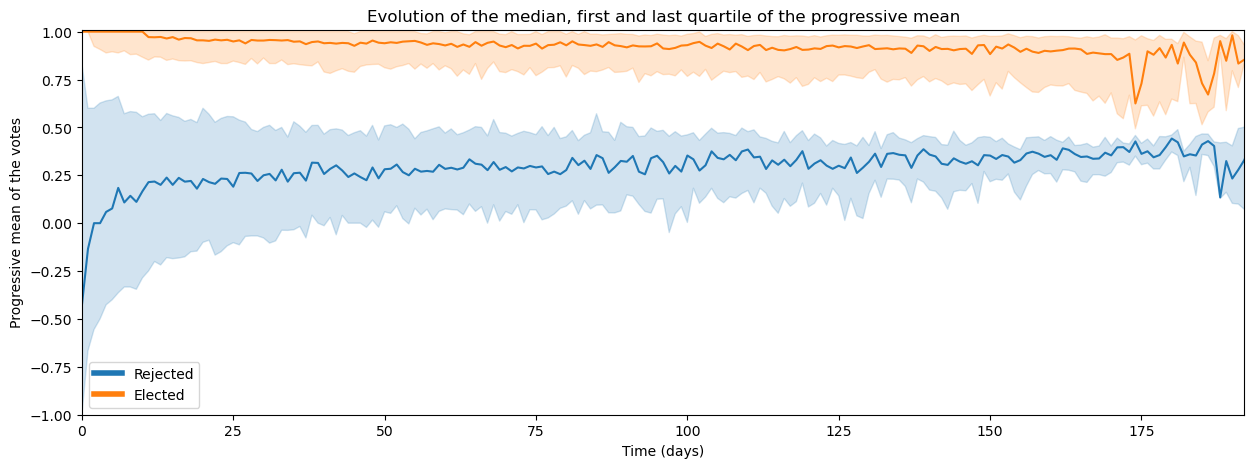

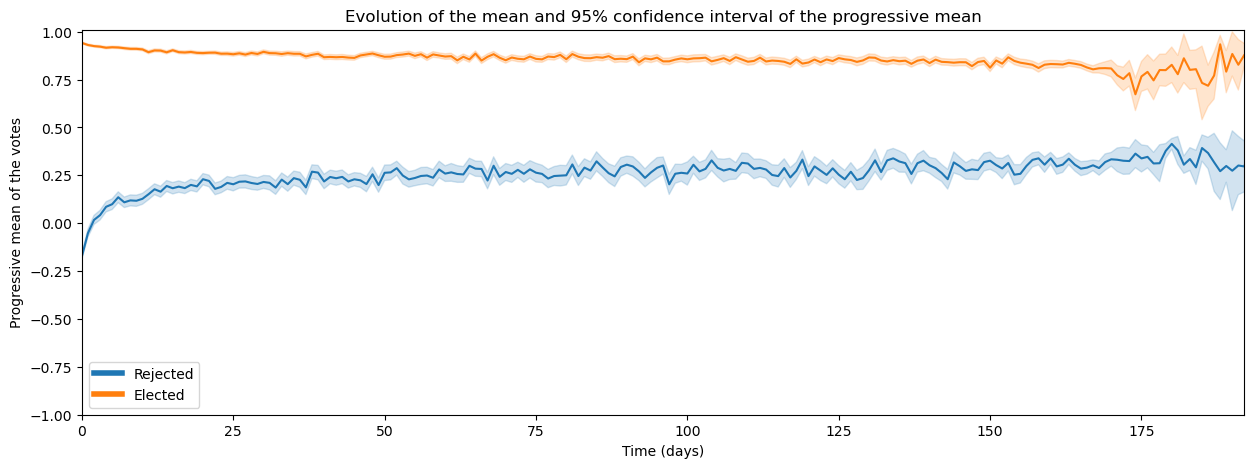

In [5]:
# Plot the evolution of the median, first and last quartile of the progressive mean
ax = plot_vote_evolution(quartiles, 'Voting_time')
ax.set_title('Evolution of the median, first and last quartile of the progressive mean')
plt.show()

# Plot the evolution of the mean and 95% confidence interval of the progressive mean
ax = plot_vote_evolution(sem, 'Voting_time')
ax.set_title('Evolution of the mean and 95% confidence interval of the progressive mean')
plt.show()


In [6]:
# Election evolution by vote rank
# For each vote add a column with the number of votes that were casted before it
rank = df_vote_evolution.groupby(['Results', 'Target', 'Round']).apply(lambda x: pd.Series(np.arange(1, len(x)+1), index=x.index)).reset_index(level=[0,1,2], drop=True)
# Combine the rank with the original dataframe
rank = df_vote_evolution.join(rank.rename('rank'))
rank = rank.groupby(['Results', 'rank']).progressive_mean

# Compute the median, first and last quartile
quartiles = get_quartiles(rank)

# Compute the mean and 95% confidence interval
sem = get_confidence_interval(rank)

# Display the results
display(quartiles.sample(5))
display(sem.sample(5))

,Results,rank,lower,center,upper
24,-1.0,25,-0.200000,0.160000,0.560000
489,1.0,213,0.495305,0.652582,0.903756
353,1.0,77,0.792208,0.935065,0.974026
66,-1.0,67,0.134328,0.343284,0.481343
204,-1.0,205,0.385366,0.404878,0.440244


,Results,rank,center,sem,lower,upper
257,-1.0,258,0.379845,0.036839,0.307641,0.452049
200,-1.0,201,0.397105,0.042565,0.313679,0.480532
321,1.0,45,0.882603,0.004435,0.873911,0.891295
344,1.0,68,0.869304,0.005723,0.858088,0.880521
444,1.0,168,0.769841,0.036550,0.698203,0.841480


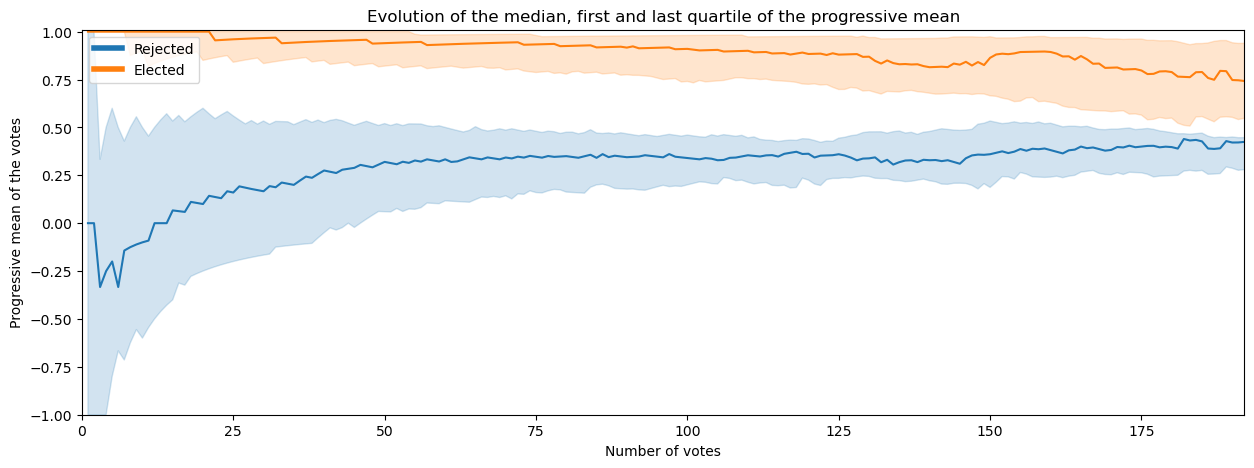

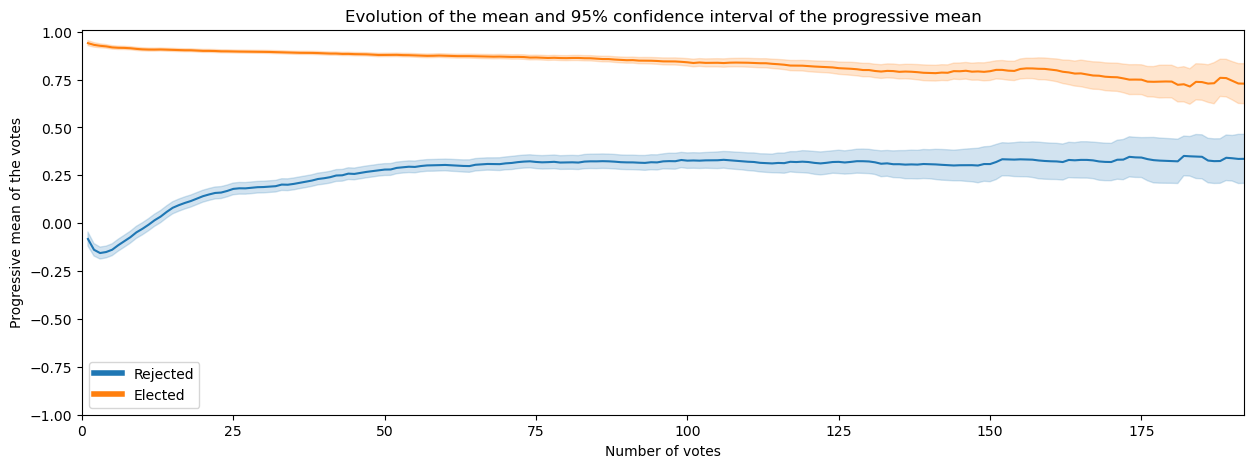

In [7]:
# Plot the evolution of the median, first and last quartile of the progressive mean
ax = plot_vote_evolution(quartiles, 'rank')
ax.set_title('Evolution of the median, first and last quartile of the progressive mean')
plt.show()

# Plot the evolution of the mean and 95% confidence interval of the progressive mean
ax = plot_vote_evolution(sem, 'rank')
ax.set_title('Evolution of the mean and 95% confidence interval of the progressive mean')
plt.show()

#### Scatter plots and density

# Knowledge tracing models to predict the outcome of the election

In [8]:
import 

SyntaxError: invalid syntax (2494350585.py, line 1)